In [12]:
import pandas as pd
import plotly.express as px
import numpy as np
import csv
import math

In [13]:
import inspect
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
bitcoin_news_2022 = pd.read_csv("bitcoin_news_2022.csv")

In [27]:
bitcoin_news_2022

,year,month,day,year_month,year_month_day,healine,link
0,2022,1,1,202201,20220101,Bitcoin starts 2022 at $47.2K as fresh researc...,https://cointelegraph.com/news/bitcoin-starts-...
1,2022,1,1,202201,20220101,The year for Bitcoin: A 2021 roundup of the fl...,https://cointelegraph.com/news/the-year-for-bi...
2,2022,1,1,202201,20220101,El Salvador President Nayib Bukele Predicts Tw...,https://www.nasdaq.com/articles/el-salvador-pr...
3,2022,1,1,202201,20220101,Mexico Announces It Will Issue Its Own Digital...,https://news.bitcoin.com/mexico-announces-it-w...
4,2022,1,1,202201,20220101,"Kevin O'Leary Reveals Crypto Strategy, Why He ...",https://news.bitcoin.com/kevin-oleary-crypto-s...
...,...,...,...,...,...,...,...
252,2022,1,12,202201,20220112,Today in Bitcoin history: 13-year anniversary ...,https://cointelegraph.com/news/today-in-bitcoi...
253,2022,1,12,202201,20220112,Traders say Bitcoin run to $44K may be a relie...,https://cointelegraph.com/news/traders-say-bit...
254,2022,1,12,202201,20220112,EverRise Director Jenn Duong on Developing Sec...,https://news.bitcoin.com/everrise-director-jen...
255,2022,1,12,202201,20220112,Financial Guru Dave Ramsey Says Crypto Is 'Fun...,https://news.bitcoin.com/financial-guru-dave-r...


In [14]:
from selenium.webdriver.common.by import By
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [15]:
def sentiment_scores(sentence):
 
    # Create a SentimentIntensityAnalyzer object.
    sid_obj = SentimentIntensityAnalyzer()
 
    # polarity_scores method of SentimentIntensityAnalyzer
    # object gives a sentiment dictionary.
    # which contains pos, neg, neu, and compound scores.
    sentiment_dict = sid_obj.polarity_scores(sentence)
    return sentiment_dict

In [6]:
sentiment_scores("good")

{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.4404}

In [19]:
bitcoin_news_2022

,year,month,day,year_month,year_month_day,healine,link
0,2022,1,1,202201,20220101,Bitcoin starts 2022 at $47.2K as fresh researc...,https://cointelegraph.com/news/bitcoin-starts-...
1,2022,1,1,202201,20220101,The year for Bitcoin: A 2021 roundup of the fl...,https://cointelegraph.com/news/the-year-for-bi...
2,2022,1,1,202201,20220101,El Salvador President Nayib Bukele Predicts Tw...,https://www.nasdaq.com/articles/el-salvador-pr...
3,2022,1,1,202201,20220101,Mexico Announces It Will Issue Its Own Digital...,https://news.bitcoin.com/mexico-announces-it-w...
4,2022,1,1,202201,20220101,"Kevin O'Leary Reveals Crypto Strategy, Why He ...",https://news.bitcoin.com/kevin-oleary-crypto-s...
...,...,...,...,...,...,...,...
8645,2022,7,31,202207,20220731,The Right Side of Crypto Regulation: Instituti...,https://cryptonews.com/exclusives/the-right-si...
8646,2022,7,31,202207,20220731,Is Coinbase in Trouble?,https://99bitcoins.com/bitcoin-news-summary-au...
8647,2022,7,31,202207,20220731,Dixon Takes Over Katie Haun's Board Seat,https://www.thecoinrepublic.com/2022/07/31/dix...
8648,2022,7,31,202207,20220731,"Top Trader Warns of Possible Crypto Pullback, ...",https://dailyhodl.com/2022/07/31/top-trader-wa...


In [29]:
vader_neg=[]
vader_neu=[]
vader_pos=[]

In [30]:
roberta_neg = []
roberta_neu = []
roberta_pos = []


In [31]:
for i in range(len(bitcoin_news_2022)):
    vader_neg.append(sentiment_scores(bitcoin_news_2022['healine'][i])['neg'])
    vader_neu.append(sentiment_scores(bitcoin_news_2022['healine'][i])['neu'])
    vader_pos.append(sentiment_scores(bitcoin_news_2022['healine'][i])['pos'])
    roberta_neg.append(polarity_scores_roberta(bitcoin_news_2022['healine'][i])[0])
    roberta_neu.append(polarity_scores_roberta(bitcoin_news_2022['healine'][i])[1])
    roberta_pos.append(polarity_scores_roberta(bitcoin_news_2022['healine'][i])[2])
    
    
    

In [32]:

bitcoin_news_2022["vader_neg"] = vader_neg
bitcoin_news_2022["vader_neu"] = vader_neu
bitcoin_news_2022["vader_pos"] = vader_pos

bitcoin_news_2022["roberta_neg"] = roberta_neg
bitcoin_news_2022["roberta_neu"] = roberta_neu
bitcoin_news_2022["roberta_pos"] = roberta_pos


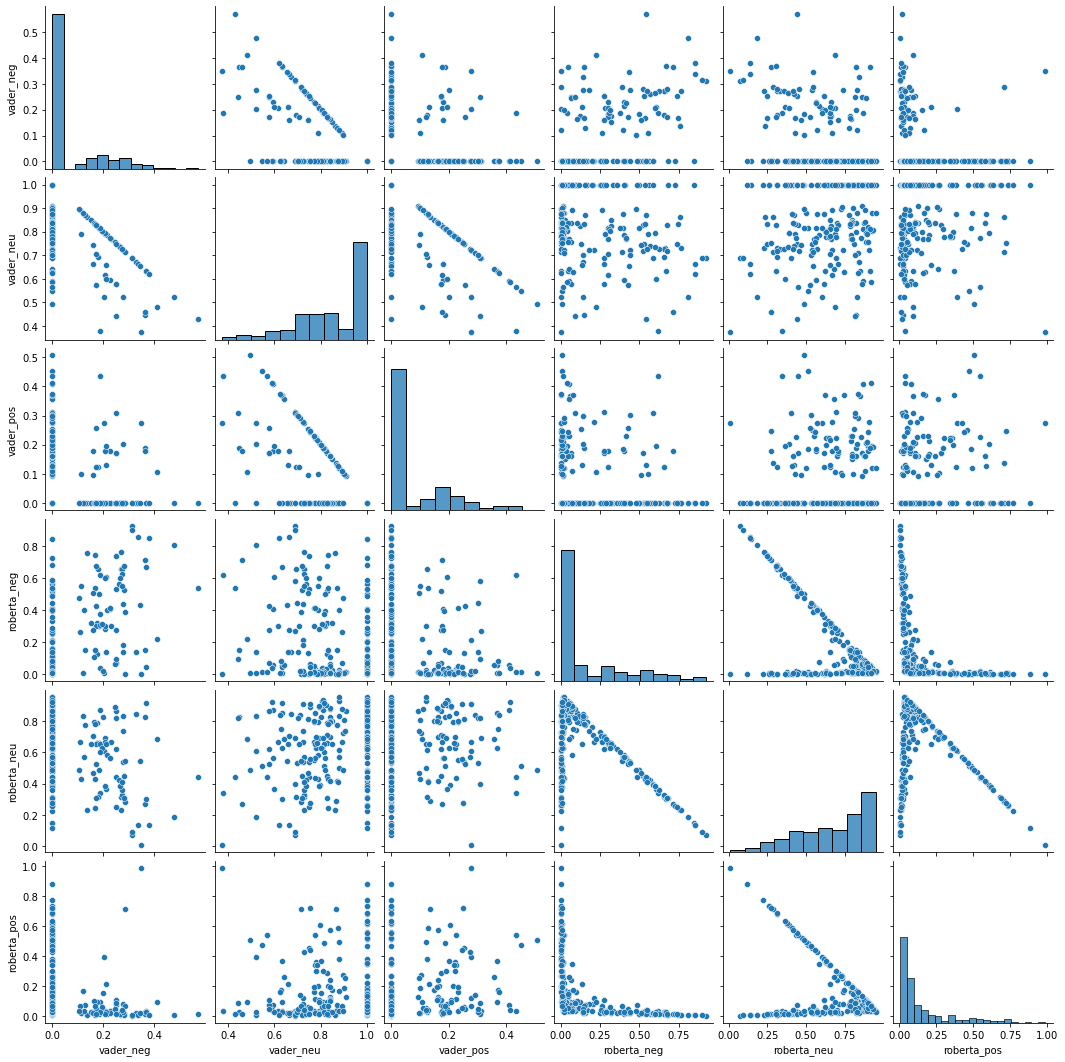

In [33]:
sns.pairplot(data=bitcoin_news_2022,
             vars=['vader_neg', 'vader_neu', 'vader_pos','roberta_neg', 'roberta_neu', 'roberta_pos'],
            palette='tab10')
plt.show()

In [4]:
from scipy.special import softmax


In [1]:
import torch

In [2]:
from transformers import AutoTokenizer


In [3]:
from transformers import AutoModelForSequenceClassification

In [5]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [9]:
def normalize(score, alpha=15):
    """
    Normalize the score to be between -1 and 1 using an alpha that
    approximates the max expected value
    """
    norm_score = score/math.sqrt((score*score) + alpha)
    return norm_score

In [19]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    print(scores)
    total = scores[0]*-1 + scores[1] + scores[2]
    print(normalize(total))
    return normalize(total)


In [28]:
text = "Bitcoin: Why is the largest cryptocurrency crashing?"

polarity_scores_roberta(text)

sentiment_scores(text)

[0.61112434 0.3699101  0.01896559]
-0.0572901058306847


{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [11]:
for i in range(len(bitcoin_news_2022)):
    roberta_neg.append(polarity_scores_roberta(bitcoin_news_2022['healine'][i])[0])
    roberta_neu.append(sentiment_scores(bitcoin_news_2022['healine'][i])[1])
    roberta_pos.append(sentiment_scores(bitcoin_news_2022['healine'][i])[2])

NameError: name 'bitcoin_news_2022' is not defined

In [ ]:
bitcoin_news_2022["roberta_neg"] = roberta_neg
bitcoin_news_2022["roberta_neu"] = roberta_neu
bitcoin_news_2022["roberta_pos"] = roberta_pos

In [32]:
bitcoin_news_2022

,year,month,day,year_month,year_month_day,healine,link,vader_neg,vader_neu,vader_pos
0,2022,1,1,202201,20220101,Bitcoin starts 2022 at $47.2K as fresh researc...,https://cointelegraph.com/news/bitcoin-starts-...,0.000,0.850,0.150
1,2022,1,1,202201,20220101,The year for Bitcoin: A 2021 roundup of the fl...,https://cointelegraph.com/news/the-year-for-bi...,0.000,0.877,0.123
2,2022,1,1,202201,20220101,El Salvador President Nayib Bukele Predicts Tw...,https://www.nasdaq.com/articles/el-salvador-pr...,0.000,0.909,0.091
3,2022,1,1,202201,20220101,Mexico Announces It Will Issue Its Own Digital...,https://news.bitcoin.com/mexico-announces-it-w...,0.000,1.000,0.000
4,2022,1,1,202201,20220101,"Kevin O'Leary Reveals Crypto Strategy, Why He ...",https://news.bitcoin.com/kevin-oleary-crypto-s...,0.000,1.000,0.000
...,...,...,...,...,...,...,...,...,...,...
8645,2022,7,31,202207,20220731,The Right Side of Crypto Regulation: Instituti...,https://cryptonews.com/exclusives/the-right-si...,0.000,1.000,0.000
8646,2022,7,31,202207,20220731,Is Coinbase in Trouble?,https://99bitcoins.com/bitcoin-news-summary-au...,0.474,0.526,0.000
8647,2022,7,31,202207,20220731,Dixon Takes Over Katie Haun's Board Seat,https://www.thecoinrepublic.com/2022/07/31/dix...,0.000,1.000,0.000
8648,2022,7,31,202207,20220731,"Top Trader Warns of Possible Crypto Pullback, ...",https://dailyhodl.com/2022/07/31/top-trader-wa...,0.070,0.704,0.226


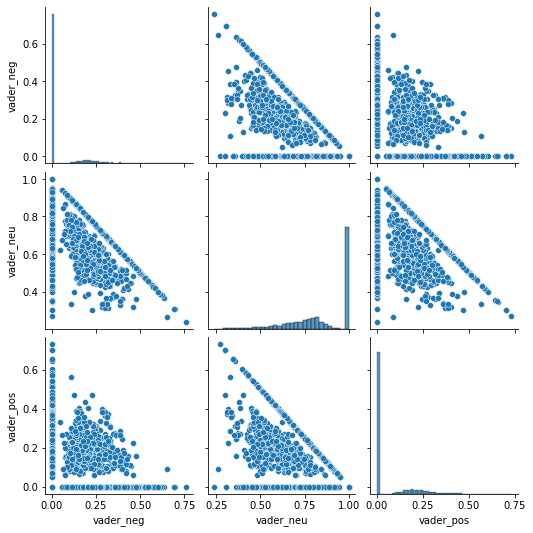

In [34]:
sns.pairplot(data=bitcoin_news_2022,
             vars=['vader_neg', 'vader_neu', 'vader_pos'],
            palette='tab10')
plt.show()

In [ ]:
sns.pairplot(data=bitcoin_news_2022,
             vars=['vader_neg', 'vader_neu', 'vader_pos','roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='Score',
            palette='tab10')
plt.show()